In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

from matplotlib.colors import LogNorm



In [2]:

####################################################################################################
####################################################################################################

file_all = "../pax_waveform_simulator/merged/merged_all_v180220.pkl"

df_all   = pd.read_pickle(file_all)
df_s1s2   = df_all[df_all['interactions'] == 1]


In [3]:

####################################################################################################
####################################################################################################

nEventsTotal = df_all.shape[0]
nEventsS1S2  = df_s1s2.shape[0]

print()
print("Total Events:   " + str(nEventsTotal))
print("S1 & S2 Events: " + str(nEventsS1S2))
display(df_s1s2[:][0:5])
print()



Total Events:   2000
S1 & S2 Events: 1205


,instruction,recoil_type,x,y,depth,s1_photons,s2_electrons,t,event_number,interactions,s1_exists,s2_exists,intr_x,intr_y,intr_z,intr_drift_time,s2_x,s2_y,reco_s2_electrons
1,1,ER,2.626434,-17.960824,57.456815,164,79,650000.0,1,1,True,True,1.620927,-16.084586,-57.42432,400480.0,1.510358,-16.041489,84.596265
3,3,ER,10.907536,-6.312277,57.780505,212,75,650000.0,3,1,True,True,10.099624,-5.860276,-57.74544,402710.0,9.854519,-5.384119,77.338971
6,6,ER,2.726006,37.749081,64.494053,265,70,650000.0,6,1,True,True,2.369048,34.787594,-64.49760,449600.0,2.550974,35.246076,76.371366
13,13,ER,-0.304233,32.576034,75.126820,34,43,650000.0,13,1,True,True,0.872807,28.303885,-75.77856,527940.0,0.934599,28.680316,50.280387
14,14,ER,36.200947,-5.005732,48.913918,136,91,650000.0,14,1,True,True,33.291353,-4.613409,-49.01040,342050.0,33.382222,-4.935027,101.278375


In [4]:

####################################################################################################
####################################################################################################

arr_s1_true = df_s1s2[:]['s1_photons'].as_matrix()
arr_s1_reco = np.zeros(3) #df_s1s2[:]['reco_s2_electrons'].as_matrix()

arr_s2_true = df_s1s2[:]['s2_electrons'].as_matrix()
arr_s2_reco = df_s1s2[:]['reco_s2_electrons'].as_matrix()




In [5]:

####################################################################################################
####################################################################################################

s1_max_true = np.amax(arr_s1_true)
s1_max_reco = np.amax(arr_s1_reco)

s2_max_true = np.amax(arr_s2_true)
s2_max_reco = np.amax(arr_s2_reco)



s1_true_mean = np.mean(arr_s1_true)
s1_reco_mean = np.mean(arr_s1_reco)
s1_true_std  = np.std (arr_s1_true)
s1_reco_std  = np.std (arr_s1_reco)

s2_true_mean = np.mean(arr_s2_true)
s2_reco_mean = np.mean(arr_s2_reco)
s2_true_std  = np.std(arr_s2_true)
s2_reco_std  = np.std(arr_s2_reco)

s1_label_true = 'true (std: %.02f, mean: %.02f)'% (s1_true_std, s1_true_mean)
s1_label_reco = 'reco (std: %.02f, mean: %.02f)'% (s1_reco_std, s1_reco_mean)
s2_label_true = 'true (std: %.02f, mean: %.02f)'% (s2_true_std, s2_true_mean)
s2_label_reco = 'reco (std: %.02f, mean: %.02f)'% (s2_reco_std, s2_reco_mean)

print()
print("S1 True Max: " + str(s1_max_true))
print("S1 Reco Max: " + str(s1_max_reco))
print()
print("S2 True Max: " + str(s2_max_true))
print("S2 Reco Max: " + str(s2_max_reco))
print()

s1_max     = 750
s1_nbins   = 750/10

s2_max     = 250
s2_nbins   = 250/5

eps       = 1


S1 True Max: 831
S1 Reco Max: 0.0

S2 True Max: 233
S2 Reco Max: 270.544001939



In [6]:

####################################################################################################
####################################################################################################

arr_s1_true_ovflw = arr_s1_true.copy()
arr_s1_reco_ovflw = arr_s1_reco.copy()

arr_s2_true_ovflw = arr_s2_true.copy()
arr_s2_reco_ovflw = arr_s2_reco.copy()

arr_s1_true_ovflw[arr_s1_true_ovflw > s1_max] = s1_max - eps
arr_s1_reco_ovflw[arr_s1_reco_ovflw > s1_max] = s1_max - eps

arr_s2_true_ovflw[arr_s2_true_ovflw > s2_max] = s2_max - eps
arr_s2_reco_ovflw[arr_s2_reco_ovflw > s2_max] = s2_max - eps



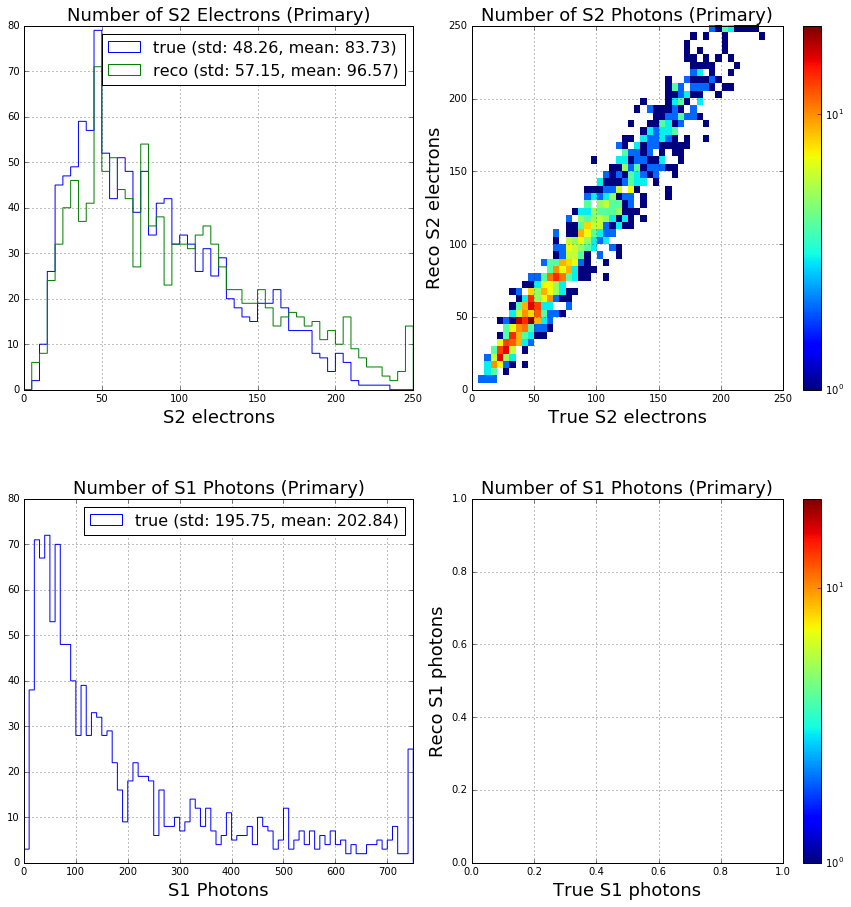

In [11]:

####################################################################################################
####################################################################################################

rows = 2
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 1)
plt.hist(arr_s2_true_ovflw, bins=s2_nbins, range=[0, s2_max], label=s2_label_true, fill=False, histtype='step')
plt.hist(arr_s2_reco_ovflw, bins=s2_nbins, range=[0, s2_max], label=s2_label_reco, fill=False, histtype='step')
plt.xlabel('S2 electrons', fontsize=18)
plt.title('Number of S2 Electrons (Primary)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 3)
plt.hist(arr_s1_true_ovflw, bins=s1_nbins, range=[0, s1_max], label=s1_label_true, fill=False, histtype='step')
plt.xlim([0, s1_max])
plt.xlabel('S1 Photons', fontsize=18)
plt.title('Number of S1 Photons (Primary)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 2)
plt.hist2d(
    arr_s2_true_ovflw,
    arr_s2_reco_ovflw,
    bins=[s2_nbins, s2_nbins],
    range=[[0, s2_max], [0, s2_max]],
    norm=LogNorm()
)
plt.title('Number of S2 Electrons (Primary)', fontsize=18)
plt.xlabel('True S2 electrons', fontsize=18)
plt.ylabel('Reco S2 electrons', fontsize=18)
plt.colorbar()
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 4)
#plt.hist2d(
#    arr_s2_true_ovflw,
#    arr_s2_reco_ovflw,
#    bins=[x_nbins, x_nbins],
#    range=[[0, x_max], [0, x_max]],
#    norm=LogNorm()
#)
plt.title('Number of S1 Photons (Primary)', fontsize=18)
plt.xlabel('True S1 photons', fontsize=18)
plt.ylabel('Reco S1 photons', fontsize=18)
plt.colorbar()
plt.grid(True)


####################################################################################################
####################################################################################################

plt.close()
print()
display(fig)
print()
